<a href="https://colab.research.google.com/github/hexe007/pro_12/blob/main/ind3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Aim of the project: Implement the AI techniques to automate verification of produced sensors.
# Characteristics will be verified in order to configure by:
# Air, Water, Isopropanol

# Essential Exploratory data analysis (EDA),analyze and investigate data sets and summarize their main characteristics.
import pandas as pd
import numpy as np

In [4]:
# Plotting Packages, appealing plots to present data in the most simple and effective way.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing

In [5]:
# Machine Learning Packages
    #Matplotlib - for plotting data in graphs and charts
    #NLTK - natural language toolkit for working with text
    #pandas - the premier data analysis tool for Python
    #scikit-learn - simplifies the implementation of different algorithms
    #Seaborn - for making statistical graphs
    #Numpy - for multi-dimensional array and matrix processing
    #Keras - high-level API that greatly simplifies working with TensorFlow
    #SciPy - for easy handling of mathematical operations
    #PyTorch - simplifies the creation of neural networks using dynamic graphs
    #TensorFlow - simplifies the creation of neural networks using static graphs

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [193]:
#Load data from data source
#I am loading a txt files containig a mix data.
#I want to store them in an object where I can access each element.

path = 'https://raw.githubusercontent.com/hexe007/pro_12/main/sesion/'
prefix = 'sesion_'
ref = '_20'
extension = '.txt'

prefix_number = 10 #number of given file sets to be loaded, 2 digits with leading 0

medium_validation = np.array(['air', 'water', 'izopropanol']) #array of given validations medium
medium_collection = {}

prefix_number_array = []

for x in range(prefix_number):
  x += 1
  prefix_number_array.append(str(x).zfill(2))

for i in medium_validation:
  for x in prefix_number_array:
    url = path + prefix  + x + ref + '/sensor' + x + '_' + i + extension
    medium_collection[i, x] = pd.read_csv(url, names=['Amplitude', 'Wavelenght'])
    #medium_collection[i, x] = pd.read_csv(url)

#medium_collection.keys()
#medium_collection.items()
prefix_number_array

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

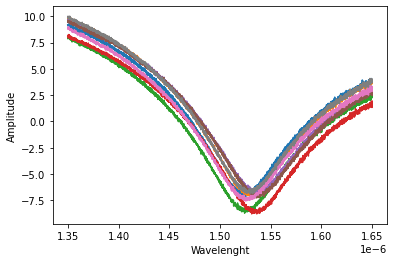

In [204]:
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:
  arr = medium_collection['air', _p_n].values
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelenght")
  plt.plot(x,y)

  #plt.plot(medium_collection['water',_p_n])
  #plt.plot(medium_collection['izopropanol',_p_n])

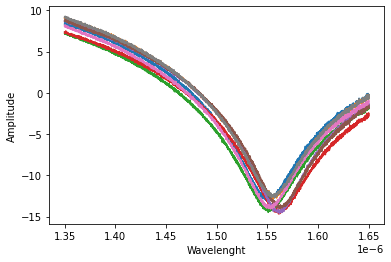

In [205]:
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:
  arr = medium_collection['water', _p_n].values
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelenght")
  plt.plot(x,y)

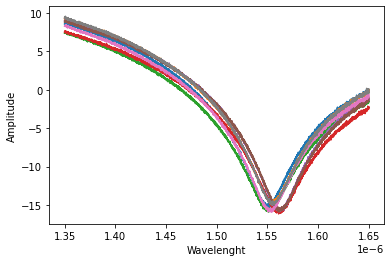

In [206]:
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:
  arr = medium_collection['izopropanol', _p_n].values
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelenght")
  plt.plot(x,y)

In [ ]:
df_sensor01_izopropanol= pd.read_csv('/content/sensor01_izopropanol.txt')
df_sensor01_izopropanol.head()

,1.35e-06,8.5551
0,0.000001,8.6750
1,0.000001,8.7116
2,0.000001,8.7157
3,0.000001,8.6792
4,0.000001,8.6312


In [ ]:
df_sensor01_water= pd.read_csv('/content/sensor01_water.txt')
df_sensor01_water.head()

,1.35e-06,8.357
0,0.000001,8.4287
1,0.000001,8.4422
2,0.000001,8.4144
3,0.000001,8.4034
4,0.000001,8.3351


In [ ]:
# View on: df_sensor01_air

In [ ]:
df_sensor01_air.describe()

,1.35e-06,9.1792
count,3.000000e+03,3000.000000
mean,1.500050e-06,1.187713
std,8.661697e-08,4.722722
min,1.350100e-06,-7.151200
25%,1.425075e-06,-2.635050
50%,1.500050e-06,1.615850
75%,1.575025e-06,4.879975
max,1.650000e-06,9.253300


In [ ]:
# To check for any missing values
df_sensor01_air.isna().sum()



1.35e-06    0
9.1792      0
dtype: int64

Non missing values

In [ ]:
df_sensor01_air.keys()

Index(['1.35e-06', '9.1792'], dtype='object')

In [ ]:
df_sensor01_air.values

array([[1.3501e-06, 9.2003e+00],
       [1.3502e-06, 9.1968e+00],
       [1.3503e-06, 9.1028e+00],
       ...,
       [1.6498e-06, 3.8361e+00],
       [1.6499e-06, 3.9466e+00],
       [1.6500e-06, 3.8974e+00]])

In [ ]:
df_sensor01_air.shape

(3000, 2)

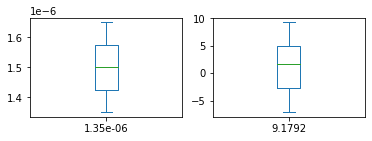

In [ ]:
df_sensor01_air.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

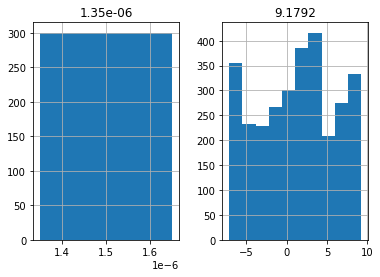

In [ ]:
# histograms using pandas plot
df_sensor01_air.hist()
plt.show()



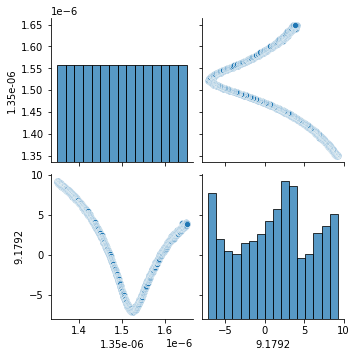

In [ ]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df_sensor01_air)


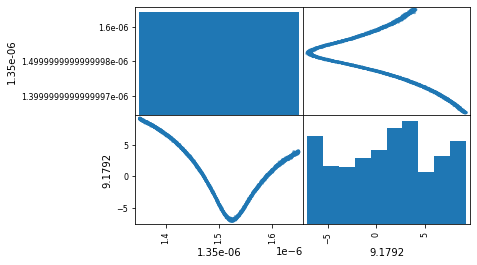

In [ ]:


# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_sensor01_air)
plt.show()



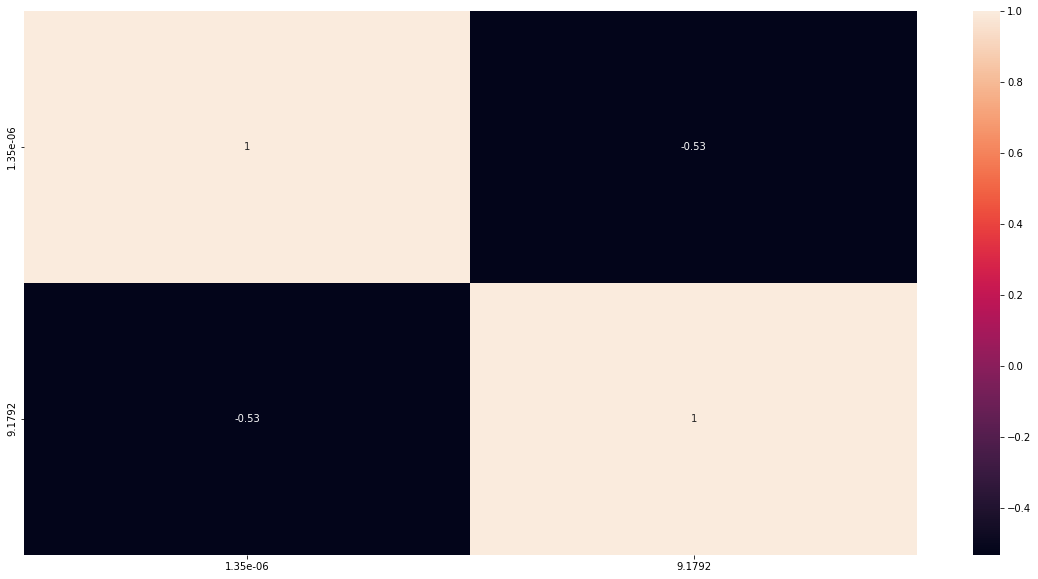

In [ ]:
plt.figure(figsize =(20,10))
sns.heatmap(df_sensor01_air.corr(), annot =True)

In [ ]:
# Split-out validation dataset
array = df_sensor01_air.values
x = array[:,0:1]
y = array[:,1]
x



array([[1.3501e-06],
       [1.3502e-06],
       [1.3503e-06],
       ...,
       [1.6498e-06],
       [1.6499e-06],
       [1.6500e-06]])

In [ ]:
y

array([9.2003, 9.1968, 9.1028, ..., 3.8361, 3.9466, 3.8974])

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [199]:
x_train

array([[1.3925e-06],
       [1.4663e-06],
       [1.3596e-06],
       ...,
       [1.5225e-06],
       [1.5754e-06],
       [1.6415e-06]])

In [ ]:
y_train

In [201]:
x_test

array([[1.5825e-06],
       [1.6246e-06],
       [1.5867e-06],
       [1.5199e-06],
       [1.5434e-06],
       [1.4868e-06],
       [1.4817e-06],
       [1.6020e-06],
       [1.5059e-06],
       [1.4766e-06],
       [1.5256e-06],
       [1.4102e-06],
       [1.5762e-06],
       [1.6060e-06],
       [1.3847e-06],
       [1.4906e-06],
       [1.5932e-06],
       [1.3694e-06],
       [1.4291e-06],
       [1.5359e-06],
       [1.4295e-06],
       [1.6272e-06],
       [1.3547e-06],
       [1.3670e-06],
       [1.6034e-06],
       [1.4974e-06],
       [1.4816e-06],
       [1.6024e-06],
       [1.4770e-06],
       [1.6270e-06],
       [1.5301e-06],
       [1.4390e-06],
       [1.4888e-06],
       [1.3963e-06],
       [1.5263e-06],
       [1.6029e-06],
       [1.4852e-06],
       [1.4559e-06],
       [1.5332e-06],
       [1.4628e-06],
       [1.3778e-06],
       [1.5083e-06],
       [1.3500e-06],
       [1.3831e-06],
       [1.6437e-06],
       [1.3913e-06],
       [1.4690e-06],
       [1.630

In [202]:
y_test

array([-2.2640e+00,  9.4703e-01, -1.8617e+00, -8.1509e+00, -7.2274e+00,
       -3.5163e+00, -2.6867e+00, -5.9084e-01, -6.6194e+00, -1.9760e+00,
       -8.4848e+00,  4.8176e+00, -2.7941e+00, -1.7705e-01,  6.3416e+00,
       -4.2914e+00, -1.2236e+00,  7.0333e+00,  3.2151e+00, -7.7592e+00,
        3.1216e+00,  1.1684e+00,  7.7798e+00,  7.2385e+00, -4.3902e-01,
       -5.2060e+00, -2.8379e+00, -4.9549e-01, -2.0921e+00,  1.4873e+00,
       -8.4212e+00,  2.3293e+00, -3.8441e+00,  5.5180e+00, -8.3901e+00,
       -2.7330e-01, -3.3998e+00,  5.1592e-01, -8.0798e+00, -8.7203e-02,
        6.5299e+00, -7.0404e+00,  7.8831e+00,  6.2797e+00,  2.0831e+00,
        5.8038e+00, -1.1607e+00,  1.1936e+00, -2.6047e+00,  3.7166e+00,
        1.1969e-01,  7.0900e+00,  7.5065e-01,  5.6474e+00, -2.4308e+00,
        3.5968e-01,  4.4644e+00, -8.1911e-01, -6.2337e+00, -6.4508e+00,
        1.8676e-01,  2.4680e+00,  6.5194e+00, -2.0525e+00, -7.8878e+00,
       -1.9602e+00,  6.3879e+00, -6.1048e+00, -3.1619e+00, -4.10